In [2]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files

In [3]:
!pip install nltk

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, RegexpStemmer, WordNetLemmatizer
from textblob import TextBlob

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [7]:
Data_1 = pd.read_csv('/content/DataP_1.csv')
Data_2 = pd.read_csv('/content/DataP_2.csv')
Data_3 = pd.read_csv('/content/DataP_3.csv')
Data_1 = Data_1.dropna()
Data_2 = Data_2.dropna()
Data_3 = Data_3.dropna()

In [8]:
vectorizer_2 = TfidfVectorizer()
T2 = vectorizer_2.fit_transform(Data_2['Tweet_P'])

joblib.dump(vectorizer_2, 'tfidf_vectorizer_2.pkl')

L2 = Data_2['Label']
T2_train, T2_test, L2_train, L2_test = train_test_split(T2, L2, test_size=0.2, random_state=42)
print(T2_train.shape, T2_test.shape, L2_train.shape, L2_test.shape)

(25563, 33214) (6391, 33214) (25563,) (6391,)


In [9]:
T1 = Data_1['Tweet_P']
L1 = Data_1['Label']
T1_train, T1_test, L1_train, L1_test = train_test_split(T1, L1, test_size=0.2, random_state=42)
print(T1_train.shape, T1_test.shape, L1_train.shape, L1_test.shape)

(19826,) (4957,) (19826,) (4957,)


In [10]:
T3 = Data_3['Tweet_P']
L3 = Data_3['Label']
T3_train, T3_test, L3_train, L3_test = train_test_split(T3, L3, test_size=0.2, random_state=42)
print(T3_train.shape, T3_test.shape, L3_train.shape, L3_test.shape)

(45389,) (11348,) (45389,) (11348,)


In [11]:
#Logistic Regression Model
model_2 = LogisticRegression()
model_2.fit(T2_train, L2_train)

LogisticRegression()

In [12]:
joblib.dump(model_2, 'logistic_regression_model_2.pkl')
model_2 = joblib.load('logistic_regression_model_2.pkl')

In [13]:
L2_predicted = model_2.predict(T2_test)
print("Model trained on Data Source 2 & Tested on Data Source 2")
print("Accuracy Score 1: \n", accuracy_score(L2_test, L2_predicted))
print("Confusion Matrix: \n", confusion_matrix(L2_test, L2_predicted))
print("Classification Report: \n", classification_report(L2_test, L2_predicted))

Model trained on Data Source 2 & Tested on Data Source 2
Accuracy Score 1: 
 0.9482084180879362
Confusion Matrix: 
 [[5938   18]
 [ 313  122]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5956
           1       0.87      0.28      0.42       435

    accuracy                           0.95      6391
   macro avg       0.91      0.64      0.70      6391
weighted avg       0.94      0.95      0.94      6391



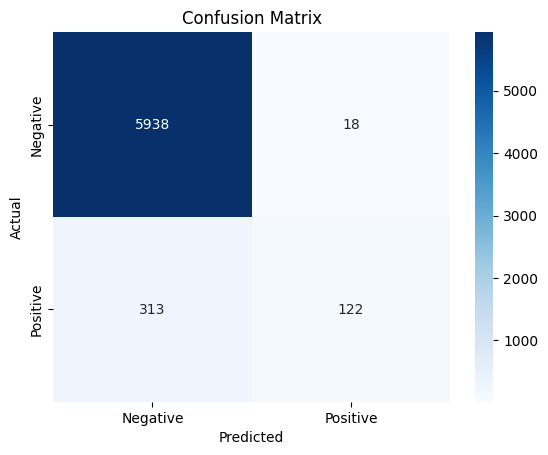

In [14]:
sns.heatmap(confusion_matrix(L2_test, L2_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
vectorizer_2 = joblib.load('tfidf_vectorizer_2.pkl')
T1_test = vectorizer_2.transform(T1_test)
model_2 = joblib.load('logistic_regression_model_2.pkl')
L1_predicted = model_2.predict(T1_test)
print("Model trained on Data Source 2 & Tested on Data Source 1")
print("Accuracy Score 1: \n", accuracy_score(L1_test, L1_predicted))
print("Confusion Matrix: \n", confusion_matrix(L1_test, L1_predicted))
print("Classification Report: \n", classification_report(L1_test, L1_predicted))

Model trained on Data Source 2 & Tested on Data Source 1
Accuracy Score 1: 
 0.17288682670970346
Confusion Matrix: 
 [[ 832    3]
 [4097   25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.17      1.00      0.29       835
           1       0.89      0.01      0.01      4122

    accuracy                           0.17      4957
   macro avg       0.53      0.50      0.15      4957
weighted avg       0.77      0.17      0.06      4957



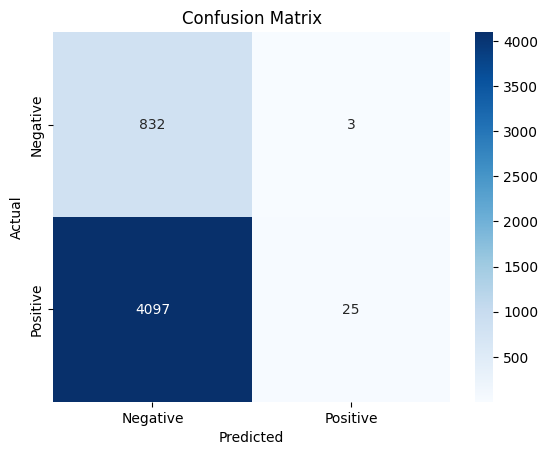

In [16]:
sns.heatmap(confusion_matrix(L1_test, L1_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
vectorizer_2 = joblib.load('tfidf_vectorizer_2.pkl')
T3_test = vectorizer_2.transform(T3_test)
model_2 = joblib.load('logistic_regression_model_2.pkl')
L3_predicted = model_2.predict(T3_test)
print("Model trained on Data Source 2 & Tested on Data Source 3")
print("Accuracy Score 1: \n", accuracy_score(L3_test, L3_predicted))
print("Confusion Matrix: \n", confusion_matrix(L3_test, L3_predicted))
print("Classification Report: \n", classification_report(L3_test, L3_predicted))

Model trained on Data Source 2 & Tested on Data Source 3
Accuracy Score 1: 
 0.5897955586887558
Confusion Matrix: 
 [[6515   17]
 [4638  178]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      1.00      0.74      6532
           1       0.91      0.04      0.07      4816

    accuracy                           0.59     11348
   macro avg       0.75      0.52      0.40     11348
weighted avg       0.72      0.59      0.45     11348



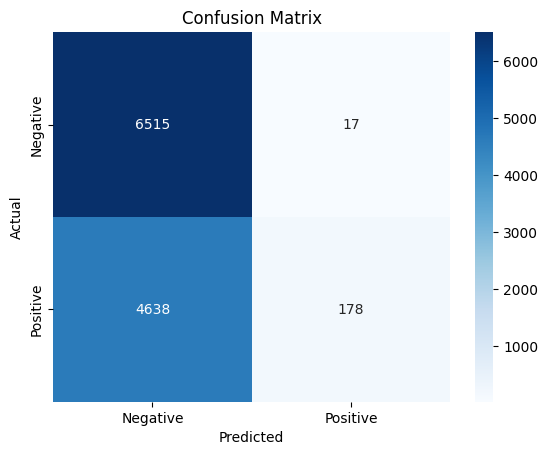

In [18]:
sns.heatmap(confusion_matrix(L3_test, L3_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()